## Figure preparation for VOR/OKR data

### Loading packages

In [1]:
library(tidyverse) #for data manipulation and visualization
library(ggpubr) #for creating easily publication ready plots
library(reshape)
library(ggplot2)

Warning message:
"package 'tidyverse' was built under R version 3.4.3"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 2.2.1     v purrr   0.2.4
v tibble  1.4.1     v dplyr   0.7.4
v tidyr   0.7.2     v stringr 1.3.0
v readr   1.1.1     v forcats 0.2.0
Warning message:
"package 'tibble' was built under R version 3.4.3"Warning message:
"package 'tidyr' was built under R version 3.4.2"Warning message:
"package 'readr' was built under R version 3.4.3"Warning message:
"package 'purrr' was built under R version 3.4.2"Warning message:
"package 'dplyr' was built under R version 3.4.3"Warning message:
"package 'stringr' was built under R version 3.4.3"Warning message:
"package 'forcats' was built under R version 3.4.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'ggpubr' was built under R version 3.4.2"Loading requi

### Import VOG data from VOG data Retriever

In [2]:
VOG.data <- read.delim(file="C:/Users/KimYG/Documents/GitHub/Jupyter_notebook/VOGdata.txt", sep = '\t', stringsAsFactors = F, header=T)
#read.delim("clipboard", sep = '\t', stringsAsFactors = F, header = T)
VOG.data

G01_292_OL,G01_293_OL,G01_901_OL,G01_902_OL,G01_903_OL,Mean,S.D,S.E.M
0.217,0.404,0.347,0.289,0.452,0.342,0.093,0.041
0.326,0.397,0.45,0.445,0.631,0.45,0.113,0.05
0.36,0.434,0.513,0.537,0.664,0.502,0.114,0.051
0.381,0.551,0.582,0.585,0.657,0.551,0.103,0.046
0.293,0.28,0.19,0.423,0.511,0.3394,0.127,0.057
-----,-----,-----,-----,-----,-----,-----,-----
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Remove the separators in dataframe

In [3]:
VOG.data2 <- VOG.data[-c(6,12,18,24,30,36),]
dim(VOG.data2)

[1] 30  8

### Add type (Gain or Phase), protocol (OKR or dVOR or lVOR), stimulu condition (frequency)

In [4]:
type <- rep(c("Gain", "Phase"), each=(dim(VOG.data2)[1])/2)
protocol <- rep(rep(c("OKR", "dVOR", "lVOR"), each=5),2)
condition <- rep(c("0 min", "15 min", "30 min","45 min","24 hr"), 6) #rep(c("0.1Hz", "0.25Hz", "0.5Hz","1.0Hz"), 6)

VOG.data2 <- cbind(type, protocol, condition, VOG.data2)
head(VOG.data2)

,type,protocol,condition,G01_292_OL,G01_293_OL,G01_901_OL,G01_902_OL,G01_903_OL,Mean,S.D,S.E.M
1,Gain,OKR,0 min,0.217,0.404,0.347,0.289,0.452,0.342,0.093,0.041
2,Gain,OKR,15 min,0.326,0.397,0.45,0.445,0.631,0.45,0.113,0.05
3,Gain,OKR,30 min,0.36,0.434,0.513,0.537,0.664,0.502,0.114,0.051
4,Gain,OKR,45 min,0.381,0.551,0.582,0.585,0.657,0.551,0.103,0.046
5,Gain,OKR,24 hr,0.293,0.28,0.19,0.423,0.511,0.3394,0.127,0.057
7,Gain,dVOR,0 min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Drop rows containing unmeasured protocol(s) 

In [5]:
VOG.data3 <- filter(VOG.data2, G01_292_OL!="NaN")
VOG.data3

type,protocol,condition,G01_292_OL,G01_293_OL,G01_901_OL,G01_902_OL,G01_903_OL,Mean,S.D,S.E.M
Gain,OKR,0 min,0.217,0.404,0.347,0.289,0.452,0.342,0.093,0.041
Gain,OKR,15 min,0.326,0.397,0.45,0.445,0.631,0.45,0.113,0.05
Gain,OKR,30 min,0.36,0.434,0.513,0.537,0.664,0.502,0.114,0.051
Gain,OKR,45 min,0.381,0.551,0.582,0.585,0.657,0.551,0.103,0.046
Gain,OKR,24 hr,0.293,0.28,0.19,0.423,0.511,0.3394,0.127,0.057
Phase,OKR,0 min,-25.14,-12.967,-14.733,-21.213,-21.67,-19.145,5.105,2.283
Phase,OKR,15 min,-13.343,-11.827,-7.557,-7,-8.927,-9.731,2.751,1.23
Phase,OKR,30 min,-11.367,-6.927,-7.44,-6.987,-8.647,-8.274,1.862,0.833
Phase,OKR,45 min,-5.737,-4.2,-6.067,-7.153,-8.547,-6.341,1.624,0.726
Phase,OKR,24 hr,-13.526,-13.519,-3.061,-7.8263,-6.481,-8.883,4.578,2.047


### Drop columns containing discriptive statistics

In [6]:
VOG.data3 <- VOG.data3[,1:(dim(VOG.data3)[2]-3)]
VOG.data3

type,protocol,condition,G01_292_OL,G01_293_OL,G01_901_OL,G01_902_OL,G01_903_OL
Gain,OKR,0 min,0.217,0.404,0.347,0.289,0.452
Gain,OKR,15 min,0.326,0.397,0.45,0.445,0.631
Gain,OKR,30 min,0.36,0.434,0.513,0.537,0.664
Gain,OKR,45 min,0.381,0.551,0.582,0.585,0.657
Gain,OKR,24 hr,0.293,0.28,0.19,0.423,0.511
Phase,OKR,0 min,-25.14,-12.967,-14.733,-21.213,-21.67
Phase,OKR,15 min,-13.343,-11.827,-7.557,-7,-8.927
Phase,OKR,30 min,-11.367,-6.927,-7.44,-6.987,-8.647
Phase,OKR,45 min,-5.737,-4.2,-6.067,-7.153,-8.547
Phase,OKR,24 hr,-13.526,-13.519,-3.061,-7.8263,-6.481


### Covert from wide-format to long-format 

In [7]:
long.format.VOG.data <- melt(VOG.data3, id.vars = c("type","protocol","condition"))
long.format.VOG.data <- long.format.VOG.data %>% select(variable, type, protocol, condition, value) 
colnames(long.format.VOG.data)  <- c("id", "type", "protocol","condition", "value")
long.format.VOG.data$value <- as.numeric(as.character(long.format.VOG.data$value))
head(long.format.VOG.data)

id,type,protocol,condition,value
G01_292_OL,Gain,OKR,0 min,0.217
G01_292_OL,Gain,OKR,15 min,0.326
G01_292_OL,Gain,OKR,30 min,0.360
G01_292_OL,Gain,OKR,45 min,0.381
G01_292_OL,Gain,OKR,24 hr,0.293
G01_292_OL,Phase,OKR,0 min,-25.140


### Prepare Gain and Phase tables

In [8]:
Gain.table <- long.format.VOG.data %>% filter(type=="Gain")
str(Gain.table)
Phase.table <- long.format.VOG.data  %>% filter(type=="Phase")
str(Phase.table)

'data.frame':	25 obs. of  5 variables:
 $ id       : Factor w/ 5 levels "G01_292_OL","G01_293_OL",..: 1 1 1 1 1 2 2 2 2 2 ...
 $ type     : Factor w/ 2 levels "Gain","Phase": 1 1 1 1 1 1 1 1 1 1 ...
 $ protocol : Factor w/ 3 levels "dVOR","lVOR",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ condition: Factor w/ 5 levels "0 min","15 min",..: 1 2 4 5 3 1 2 4 5 3 ...
 $ value    : num  0.217 0.326 0.36 0.381 0.293 0.404 0.397 0.434 0.551 0.28 ...
'data.frame':	25 obs. of  5 variables:
 $ id       : Factor w/ 5 levels "G01_292_OL","G01_293_OL",..: 1 1 1 1 1 2 2 2 2 2 ...
 $ type     : Factor w/ 2 levels "Gain","Phase": 2 2 2 2 2 2 2 2 2 2 ...
 $ protocol : Factor w/ 3 levels "dVOR","lVOR",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ condition: Factor w/ 5 levels "0 min","15 min",..: 1 2 4 5 3 1 2 4 5 3 ...
 $ value    : num  -25.14 -13.34 -11.37 -5.74 -13.53 ...


### Result Figures

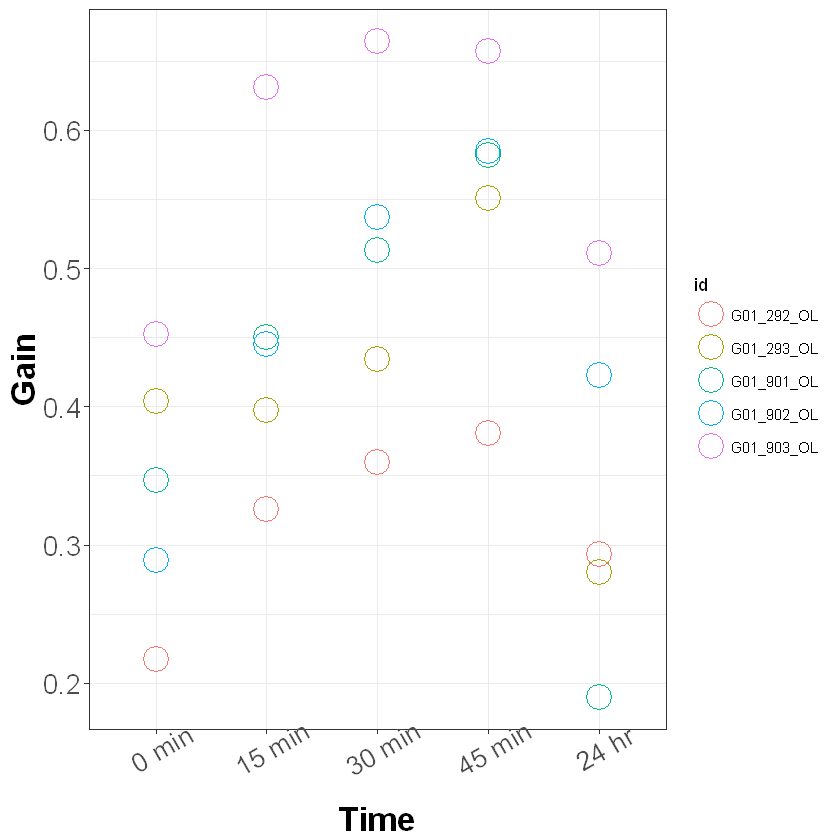

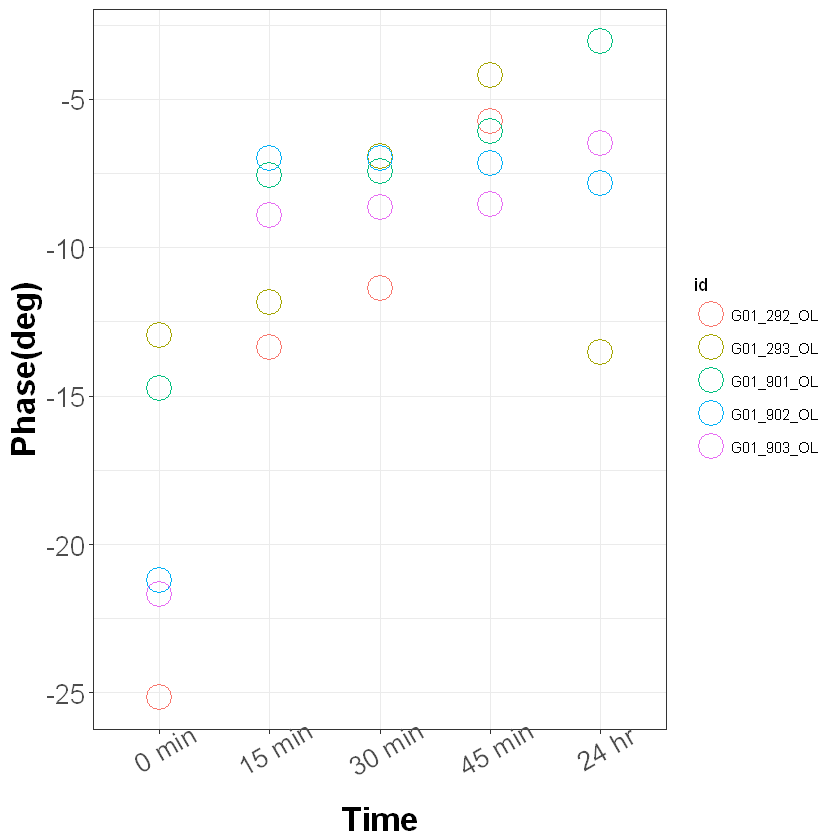

In [9]:
g <- ggplot(Gain.table, aes(x=condition, y=value, color=id)) + theme_bw() + ylab("Gain") + xlab("Time")
g <- g + geom_point(shape=1, size=7)
g <- g + theme(axis.title.x=element_text(face="bold",size=20),
          axis.text.x=element_text(angle=30,size=16),
          axis.title.y=element_text(face="bold",size=20),
          axis.text.y=element_text(size=16)) 
g + scale_x_discrete(limits=c("0 min","15 min", "30 min", "45 min", "24 hr")) #Change order of x axis manually
p <- ggplot(Phase.table, aes(x=condition, y=value, color=id)) + theme_bw() + ylab("Phase(deg)") + xlab("Time")
p <- p + geom_point(shape=1, size=7)
p <- p + theme(axis.title.x=element_text(face="bold",size=20),
          axis.text.x=element_text(angle=30,size=16),
          axis.title.y=element_text(face="bold",size=20),
          axis.text.y=element_text(size=16))
p + scale_x_discrete(limits=c("0 min","15 min", "30 min", "45 min", "24 hr"))

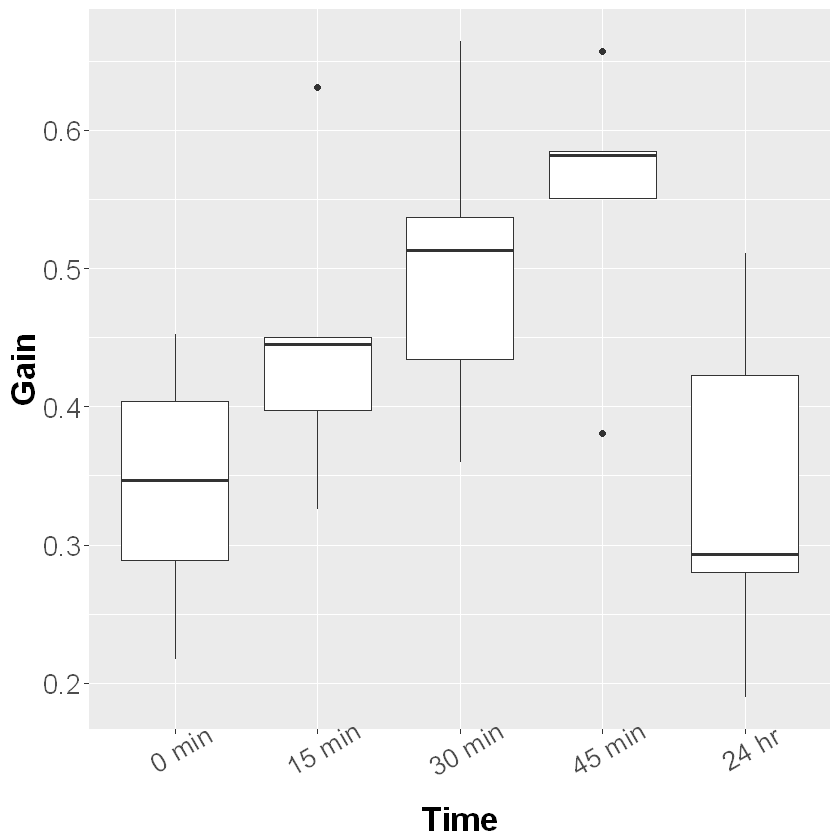

In [10]:
g1 <- ggplot(Gain.table, aes(x=condition, y=value)) + geom_boxplot() + ylab("Gain") + xlab("Time")
g1 + scale_x_discrete(limits=c("0 min", "15 min", "30 min", "45 min", "24 hr")) + 
        theme(axis.title.x=element_text(face="bold",size=20),
              axis.text.x=element_text(angle=30,size=16),
              axis.title.y=element_text(face="bold",size=20),
              axis.text.y=element_text(size=16))

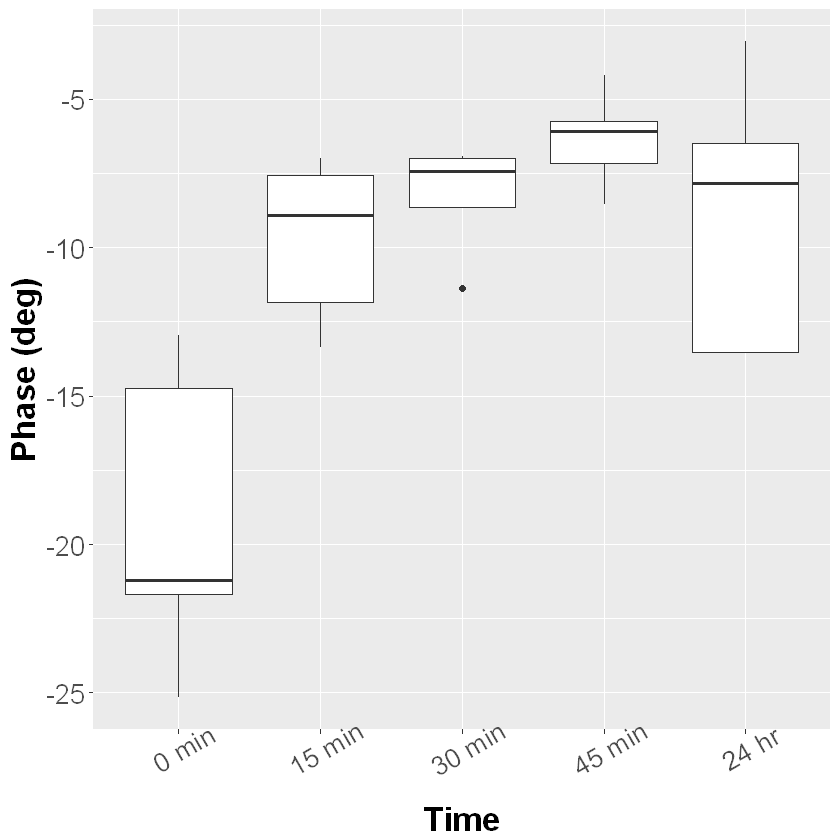

In [11]:
p1 <- ggplot(Phase.table, aes(x=condition, y=value)) + geom_boxplot() + ylab("Phase (deg)") + xlab("Time")
p1 + scale_x_discrete(limits=c("0 min", "15 min", "30 min", "45 min", "24 hr")) + 
        theme(axis.title.x=element_text(face="bold",size=20),
              axis.text.x=element_text(angle=30,size=16),
              axis.title.y=element_text(face="bold",size=20),
              axis.text.y=element_text(size=16))

### Hypothesis Testing using Linear Mixed Model

In [12]:
library(lme4)
library(nlme)
library(multcomp)

Warning message:
"package 'lme4' was built under R version 3.4.4"Loading required package: Matrix

Attaching package: 'Matrix'

The following object is masked from 'package:reshape':

    expand

The following object is masked from 'package:tidyr':

    expand


Attaching package: 'nlme'

The following object is masked from 'package:lme4':

    lmList

The following object is masked from 'package:dplyr':

    collapse

Warning message:
"package 'multcomp' was built under R version 3.4.2"Loading required package: mvtnorm
Loading required package: survival
Loading required package: TH.data
Warning message:
"package 'TH.data' was built under R version 3.4.2"Loading required package: MASS

Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select


Attaching package: 'TH.data'

The following object is masked from 'package:MASS':

    geyser



In [13]:
LMM.Gain <- lme(value ~ condition, random=~1|id, data=Gain.table, na.action="na.omit")
LMM.Phase <- lme(value ~ condition, random=~1|id, data=Phase.table, na.action="na.omit")

av.Gain <- anova(LMM.Gain)
av.Phase <- anova(LMM.Phase)

av.Gain
av.Phase

,numDF,denDF,F-value,p-value
(Intercept),1,16,101.88361,2.412053e-08
condition,4,16,12.57412,8.136021e-05


,numDF,denDF,F-value,p-value
(Intercept),1,16,114.3093,1.074929e-08
condition,4,16,13.6526,4.995420e-05


In [14]:
comp.condition <- glht(LMM.Gain, linfct=mcp(condition="Tukey"))

summary(comp.condition)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lme.formula(fixed = value ~ condition, data = Gain.table, random = ~1 | 
    id, na.action = "na.omit")

Linear Hypotheses:
                     Estimate Std. Error z value Pr(>|z|)    
15 min - 0 min == 0   0.10800    0.03782   2.856   0.0349 *  
24 hr - 0 min == 0   -0.00240    0.03782  -0.063   1.0000    
30 min - 0 min == 0   0.15980    0.03782   4.225   <0.001 ***
45 min - 0 min == 0   0.20940    0.03782   5.537   <0.001 ***
24 hr - 15 min == 0  -0.11040    0.03782  -2.919   0.0290 *  
30 min - 15 min == 0  0.05180    0.03782   1.370   0.6472    
45 min - 15 min == 0  0.10140    0.03782   2.681   0.0568 .  
30 min - 24 hr == 0   0.16220    0.03782   4.289   <0.001 ***
45 min - 24 hr == 0   0.21180    0.03782   5.600   <0.001 ***
45 min - 30 min == 0  0.04960    0.03782   1.312   0.6840    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values r

In [15]:
comp.condition2 <- glht(LMM.Phase, linfct=mcp(condition="Tukey"))

summary(comp.condition2)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lme.formula(fixed = value ~ condition, data = Phase.table, random = ~1 | 
    id, na.action = "na.omit")

Linear Hypotheses:
                     Estimate Std. Error z value Pr(>|z|)    
15 min - 0 min == 0    9.4138     1.9155   4.914   <1e-04 ***
24 hr - 0 min == 0    10.2619     1.9155   5.357   <1e-04 ***
30 min - 0 min == 0   10.8710     1.9155   5.675   <1e-04 ***
45 min - 0 min == 0   12.8038     1.9155   6.684   <1e-04 ***
24 hr - 15 min == 0    0.8481     1.9155   0.443    0.992    
30 min - 15 min == 0   1.4572     1.9155   0.761    0.942    
45 min - 15 min == 0   3.3900     1.9155   1.770    0.391    
30 min - 24 hr == 0    0.6091     1.9155   0.318    0.998    
45 min - 24 hr == 0    2.5419     1.9155   1.327    0.674    
45 min - 30 min == 0   1.9328     1.9155   1.009    0.851    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values 